# Clustering Assignment

#### Problem Statement
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.<br>

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.<br>

#### Business Goal:
- Categorise the countries using socio-economic and health factors that determine the overall development of the country.
- Make suggestions on the country the CEO needs to focus on most

#### Assignment Steps:
1. Read and Understand Data
2. Data Visualization
3. Data Preparation
4. Modelling
5. Final Analysis and Making Recommendation / Suggestion

### 1. Reading & Understanding the data

In [1]:
# Importing various libraries required
# Supressing warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# Reading the Country dataset from the file
df = pd.read_csv('Country-data.csv')
# Checking the data
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# Checking the various aspects of the dataframe
# Number of rows & columns
df.shape
# The dataframe has 167 rows and 10 columns

(167, 10)

In [4]:
# Checking the missing values
df.info()
# There are no missing values in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
# Checking the summary of the dataframe
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### 2. Visualising the data

##### Graphs for various variables

In [6]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [7]:
# Changing the percentage variables, exports, imports & health
df['exports_actual'] = df.exports*df.gdpp/100
df['imports_actual'] = df.imports*df.gdpp/100
df['health_actual'] = df.health*df.gdpp/100
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,exports_actual,imports_actual,health_actual
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,55.30,248.297,41.9174
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1145.20,1987.740,267.8950
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1712.64,1400.440,185.9820
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2199.19,1514.370,100.6050
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,5551.00,7185.800,735.6600


In [8]:
# Dropping the exports imports & health column
df = df.drop(['exports', 'health', 'imports'], axis = 1)
df.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_actual,imports_actual,health_actual
0,Afghanistan,90.2,1610,9.44,56.2,5.82,553,55.30,248.297,41.9174
1,Albania,16.6,9930,4.49,76.3,1.65,4090,1145.20,1987.740,267.8950
2,Algeria,27.3,12900,16.10,76.5,2.89,4460,1712.64,1400.440,185.9820
3,Angola,119.0,5900,22.40,60.1,6.16,3530,2199.19,1514.370,100.6050
4,Antigua and Barbuda,10.3,19100,1.44,76.8,2.13,12200,5551.00,7185.800,735.6600


In [9]:
# Univariate Analysis
# Finding the Top 10 Conutries with High Child Mortality rate
df_child_mort = df.sort_values('child_mort', ascending = False)
df_child_mort = df_child_mort.head(10)

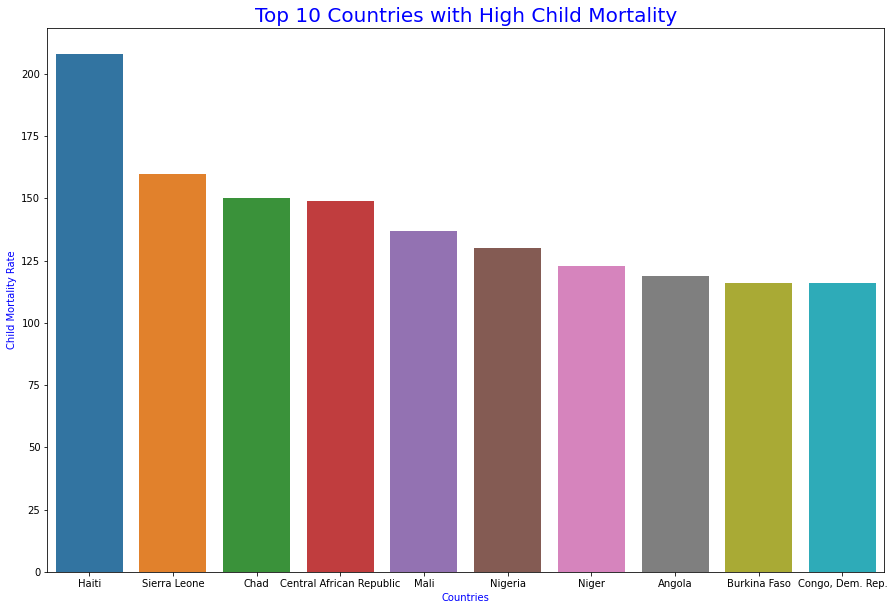

In [10]:
# Plotting the bar graph with country on x-axis and child mortality on y-axis
plt.figure(figsize = (15,10))
sns.barplot(x = 'country', y = 'child_mort', data = df_child_mort)
plt.title("Top 10 Countries with High Child Mortality", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("Countries", fontdict={'fontsize': 10, 'fontweight' : 3, 'color' : 'Blue'})
plt.ylabel("Child Mortality Rate", fontdict={'fontsize': 10, 'fontweight' : 3, 'color' : 'Blue'})
plt.show()

#### Haiti has the highest Child Mortality Rate under 5 years of age per 1000 live births

In [93]:
# Finding the Top 10 Conutries with low Income
df_income = df.sort_values('income')
df_income = df_income.head(10)

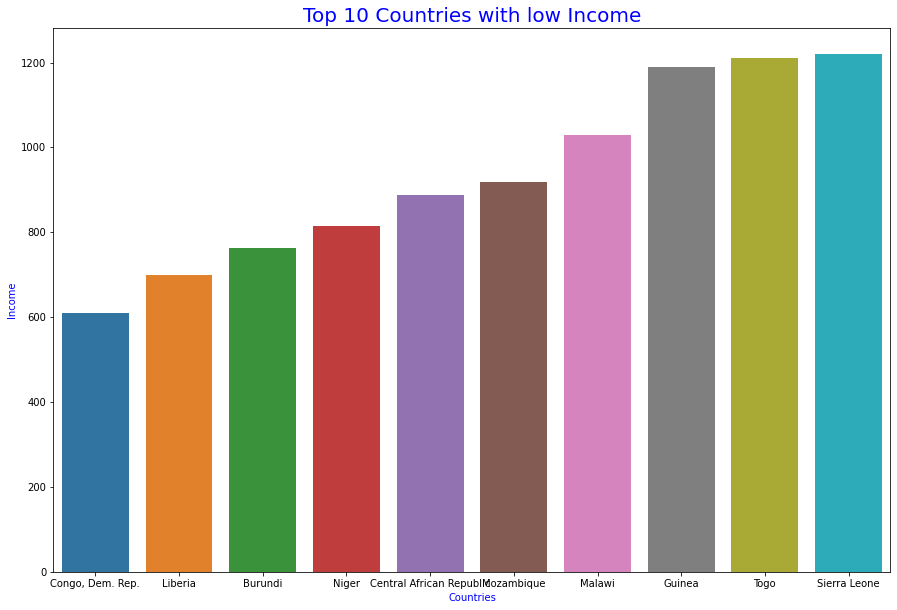

In [94]:
# Plotting the bar graph with country on x-axis and income on y-axis
plt.figure(figsize = (15,10))
sns.barplot(x = 'country', y = 'income', data = df_income)
plt.title("Top 10 Countries with low Income", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("Countries", fontdict={'fontsize': 10, 'fontweight' : 3, 'color' : 'Blue'})
plt.ylabel("Income", fontdict={'fontsize': 10, 'fontweight' : 3, 'color' : 'Blue'})
plt.show()

#### Congo, Dem.Rep. shows the lowest income

In [11]:
# Finding the Top 10 Conutries with High Income
df_income = df.sort_values('income', ascending = False)
df_income = df_income.head(10)

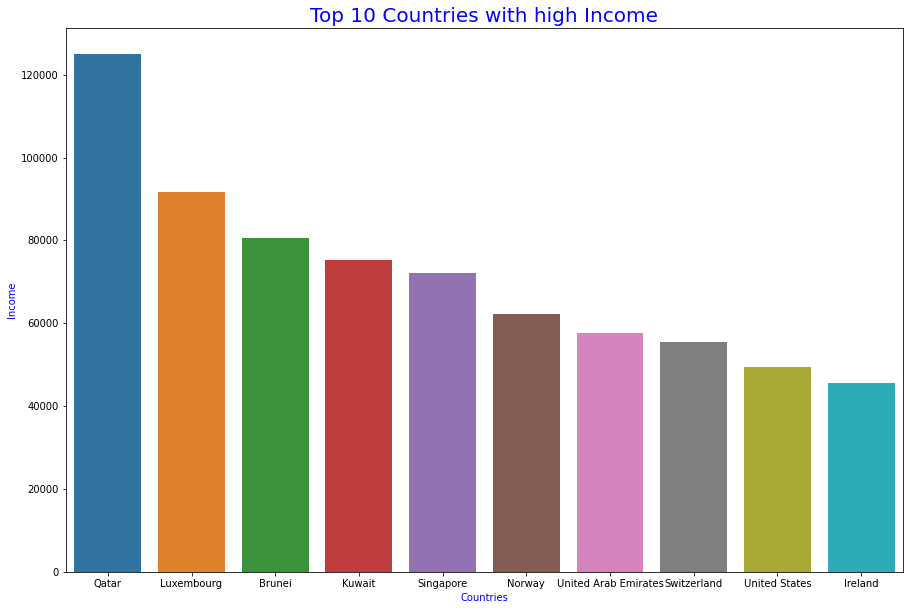

In [92]:
# Plotting the bar graph with country on x-axis and income on y-axis
plt.figure(figsize = (15,10))
sns.barplot(x = 'country', y = 'income', data = df_income)
plt.title("Top 10 Countries with high Income", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("Countries", fontdict={'fontsize': 10, 'fontweight' : 3, 'color' : 'Blue'})
plt.ylabel("Income", fontdict={'fontsize': 10, 'fontweight' : 3, 'color' : 'Blue'})
plt.show()

#### Qatar has the highest Net Income per person

In [13]:
# Finding the Top 10 Conutries with Low GDPP
df_gdpp = df.sort_values('gdpp')
df_gdpp = df_gdpp.head(10)

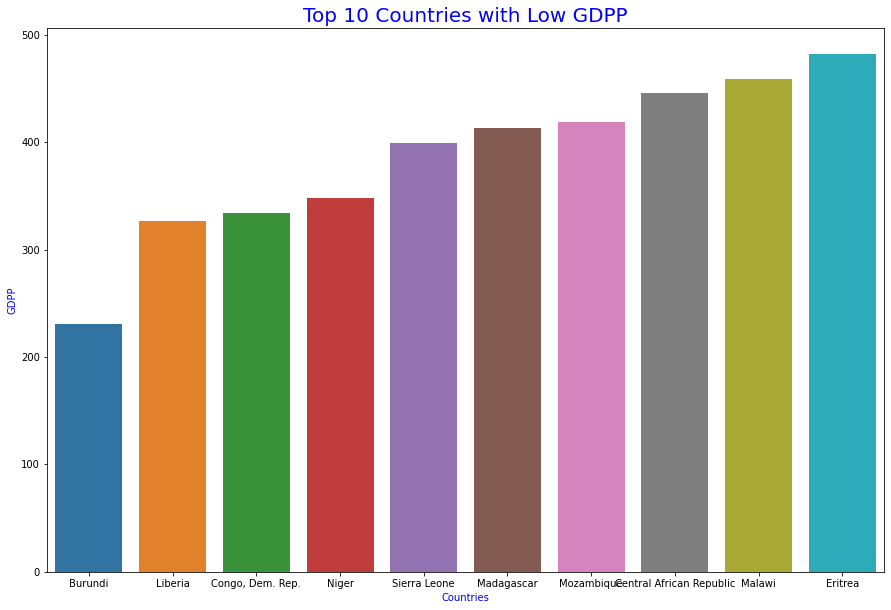

In [14]:
# Plotting the bar graph with country on x-axis and gdpp on y-axis
plt.figure(figsize = (15,10))
sns.barplot(x = 'country', y = 'gdpp', data = df_gdpp)
plt.title("Top 10 Countries with Low GDPP", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("Countries", fontdict={'fontsize': 10, 'fontweight' : 3, 'color' : 'Blue'})
plt.ylabel("GDPP", fontdict={'fontsize': 10, 'fontweight' : 3, 'color' : 'Blue'})
plt.show()

#### Burundi has the lowest GDPP (GDP per capita) 

In [15]:
# Finding the Top 10 Conutries with High GDPP
df_gdpp_h = df.sort_values('gdpp', ascending = False)
df_gdpp_h = df_gdpp_h.head(10)

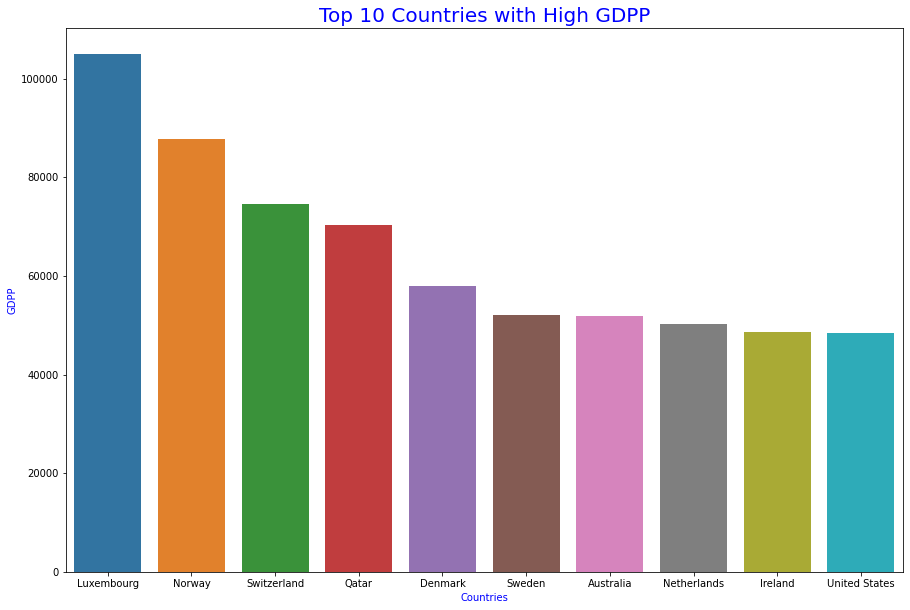

In [16]:
# Plotting the bar graph with country on x-axis and gdpp on y-axis
plt.figure(figsize = (15,10))
sns.barplot(x = 'country', y = 'gdpp', data = df_gdpp_h)
plt.title("Top 10 Countries with High GDPP", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("Countries", fontdict={'fontsize': 10, 'fontweight' : 3, 'color' : 'Blue'})
plt.ylabel("GDPP", fontdict={'fontsize': 10, 'fontweight' : 3, 'color' : 'Blue'})
plt.show()

#### Luxembourg has the highest GDPP

In [17]:
# Finding the Top 10 Conutries with High Inflation
df_inflation = df.sort_values('inflation', ascending = False)
df_inflation = df_inflation.head(10)

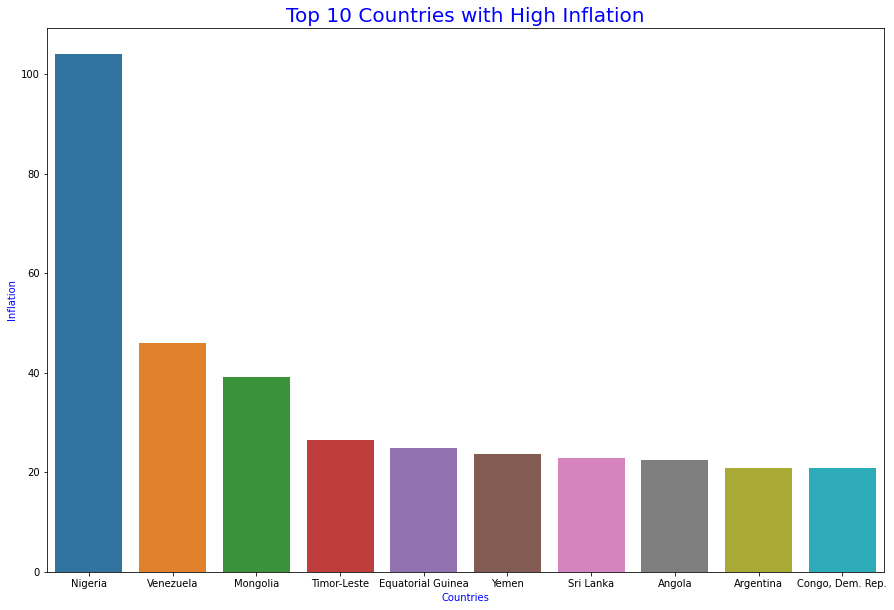

In [18]:
# Plotting the bar graph with country on x-axis and inflation on y-axis
plt.figure(figsize = (15,10))
sns.barplot(x = 'country', y = 'inflation', data = df_inflation)
plt.title("Top 10 Countries with High Inflation", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("Countries", fontdict={'fontsize': 10, 'fontweight' : 3, 'color' : 'Blue'})
plt.ylabel("Inflation", fontdict={'fontsize': 10, 'fontweight' : 3, 'color' : 'Blue'})
plt.show()

#### Nigeria shows high Inflation numbers

In [19]:
# Finding the Top 10 Conutries with low Inflation
df_inflation_l = df.sort_values('inflation')
df_inflation_l = df_inflation_l.head(10)

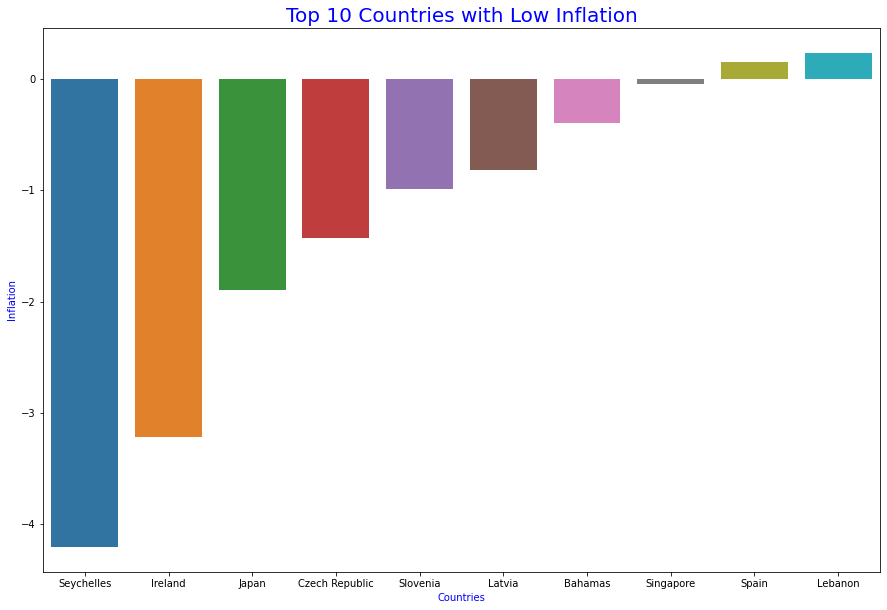

In [20]:
# Plotting the bar graph with country on x-axis and inflation on y-axis
plt.figure(figsize = (15,10))
sns.barplot(x = 'country', y = 'inflation', data = df_inflation_l)
plt.title("Top 10 Countries with Low Inflation", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("Countries", fontdict={'fontsize': 10, 'fontweight' : 3, 'color' : 'Blue'})
plt.ylabel("Inflation", fontdict={'fontsize': 10, 'fontweight' : 3, 'color' : 'Blue'})
plt.show()

#### Seychelles shows negative infaltion

In [21]:
# Finding the Top 10 Conutries with Low Life Expectancy
df_life_expec = df.sort_values('life_expec')
df_life_expec = df_life_expec.head(10)

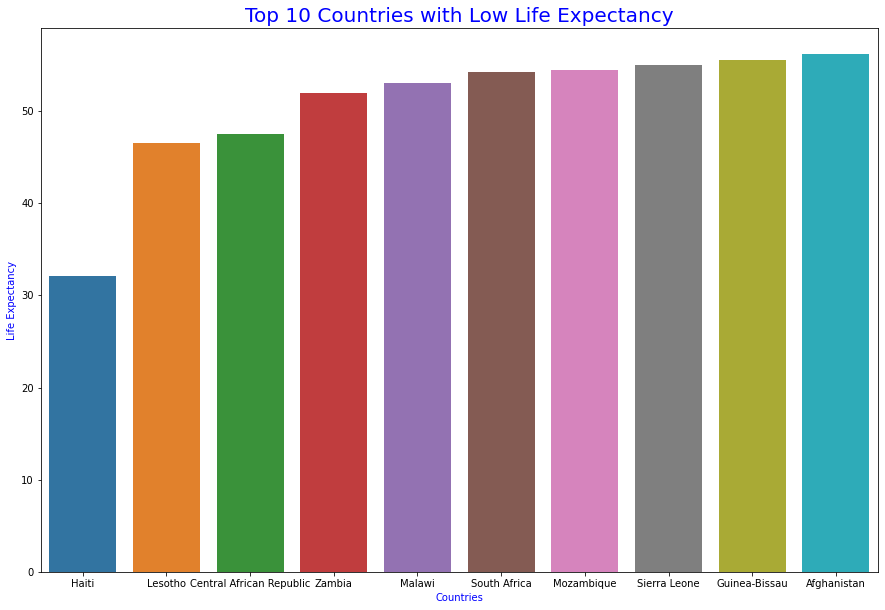

In [22]:
# Plotting the bar graph with country on x-axis and life expectancy on y-axis
plt.figure(figsize = (15,10))
sns.barplot(x = 'country', y = 'life_expec', data = df_life_expec)
plt.title("Top 10 Countries with Low Life Expectancy", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("Countries", fontdict={'fontsize': 10, 'fontweight' : 3, 'color' : 'Blue'})
plt.ylabel("Life Expectancy", fontdict={'fontsize': 10, 'fontweight' : 3, 'color' : 'Blue'})
plt.show()

#### Haiti shows low Life expectancy of a child under the current mortality circumstances

In [23]:
# Finding the Top 10 Conutries with high Life Expectancy
df_life_expec_h = df.sort_values('life_expec', ascending = False)
df_life_expec_h = df_life_expec_h.head(10)

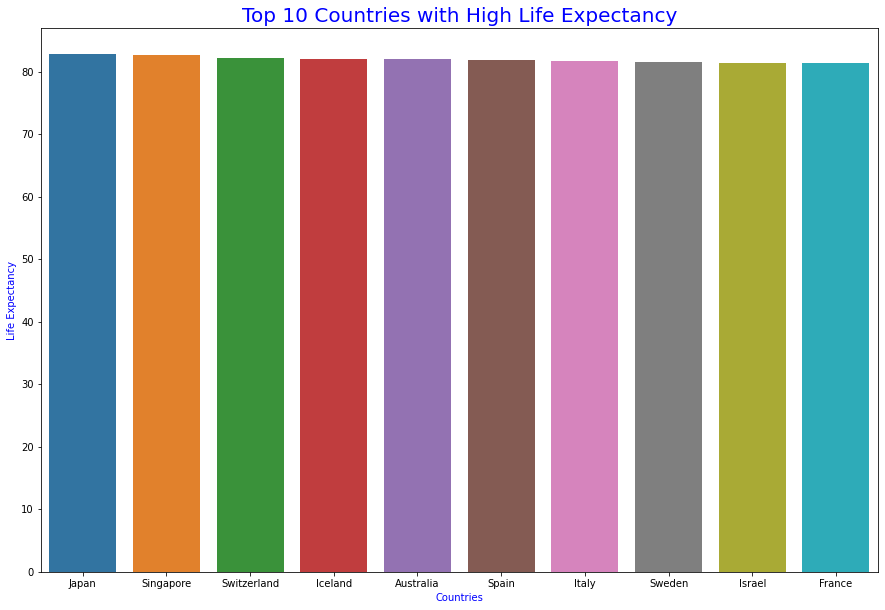

In [24]:
# Plotting the bar graph with country on x-axis and life expectancy on y-axis
plt.figure(figsize = (15,10))
sns.barplot(x = 'country', y = 'life_expec', data = df_life_expec_h)
plt.title("Top 10 Countries with High Life Expectancy", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("Countries", fontdict={'fontsize': 10, 'fontweight' : 3, 'color' : 'Blue'})
plt.ylabel("Life Expectancy", fontdict={'fontsize': 10, 'fontweight' : 3, 'color' : 'Blue'})
plt.show()

#### Japan & Singapore nearly have same results for the life expectancy of a child. The other countried in the list also have similar results.

In [25]:
# Finding the Top 10 Conutries with high Fertility
df_total_fer = df.sort_values('total_fer', ascending = False)
df_total_fer = df_total_fer.head(10)

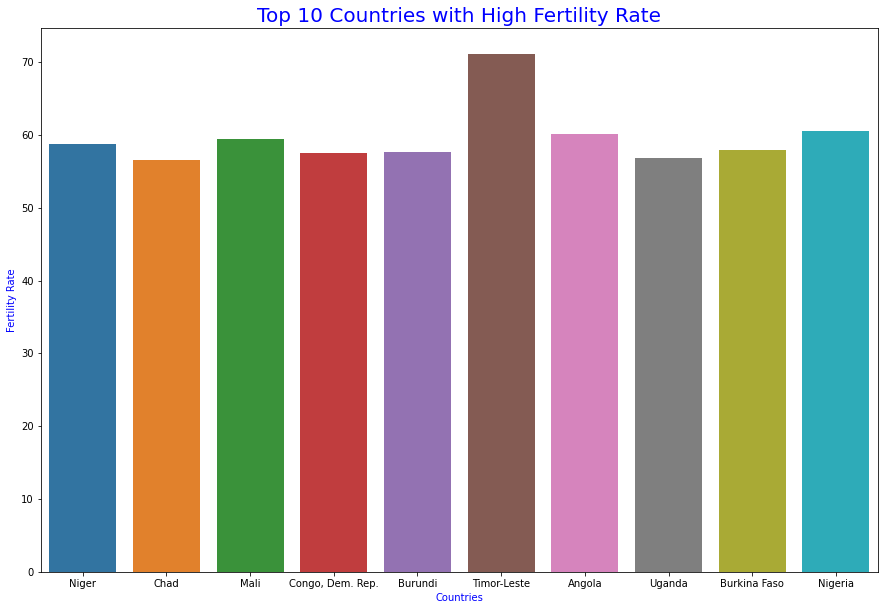

In [26]:
# Plotting the bar graph with country on x-axis and high fertility rate on y-axis
plt.figure(figsize = (15,10))
sns.barplot(x = 'country', y = 'life_expec', data = df_total_fer)
plt.title("Top 10 Countries with High Fertility Rate", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("Countries", fontdict={'fontsize': 10, 'fontweight' : 3, 'color' : 'Blue'})
plt.ylabel("Fertility Rate", fontdict={'fontsize': 10, 'fontweight' : 3, 'color' : 'Blue'})
plt.show()

#### Timor-Leste has the highest fertility rate, the number of children born to each woman under the current age-fertility circumstances

In [27]:
# Finding the Top 10 Conutries with low Fertility
df_total_fer_l = df.sort_values('total_fer')
df_total_fer_l = df_total_fer_l.head(10)

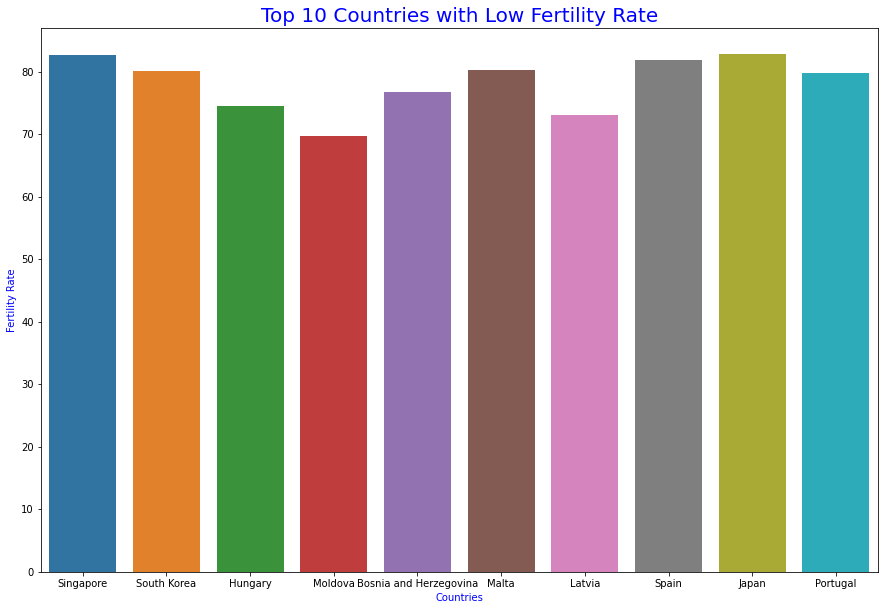

In [28]:
# Plotting the bar graph with country on x-axis and low fertility rate on y-axis
plt.figure(figsize = (15,10))
sns.barplot(x = 'country', y = 'life_expec', data = df_total_fer_l)
plt.title("Top 10 Countries with Low Fertility Rate", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("Countries", fontdict={'fontsize': 10, 'fontweight' : 3, 'color' : 'Blue'})
plt.ylabel("Fertility Rate", fontdict={'fontsize': 10, 'fontweight' : 3, 'color' : 'Blue'})
plt.show()

#### Singapore & Japan shows similar results in the fertility rate

In [29]:
# Finding the Top 10 Conutries with high Exports
df_exports_actual = df.sort_values('exports_actual', ascending = False)
df_exports_actual = df_exports_actual.head(10)

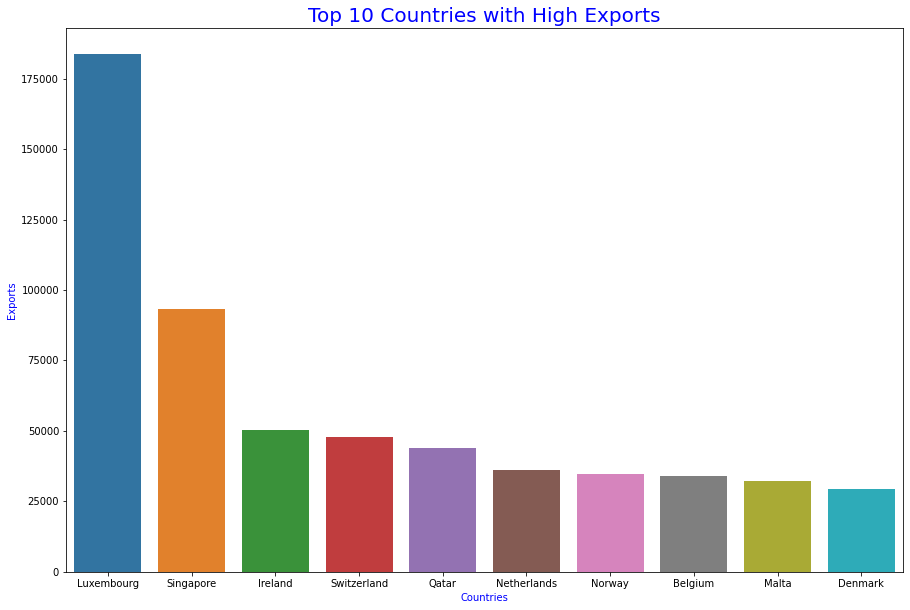

In [30]:
# Plotting the bar graph with country on x-axis and high Exports on y-axis
plt.figure(figsize = (15,10))
sns.barplot(x = 'country', y = 'exports_actual', data = df_exports_actual)
plt.title("Top 10 Countries with High Exports", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("Countries", fontdict={'fontsize': 10, 'fontweight' : 3, 'color' : 'Blue'})
plt.ylabel("Exports", fontdict={'fontsize': 10, 'fontweight' : 3, 'color' : 'Blue'})
plt.show()

#### Luxembourg has the highest exports of goods and services per capita

In [31]:
# Finding the Top 10 Conutries with low Exports
df_exports_actual_l = df.sort_values('exports_actual')
df_exports_actual_l = df_exports_actual_l.head(10)

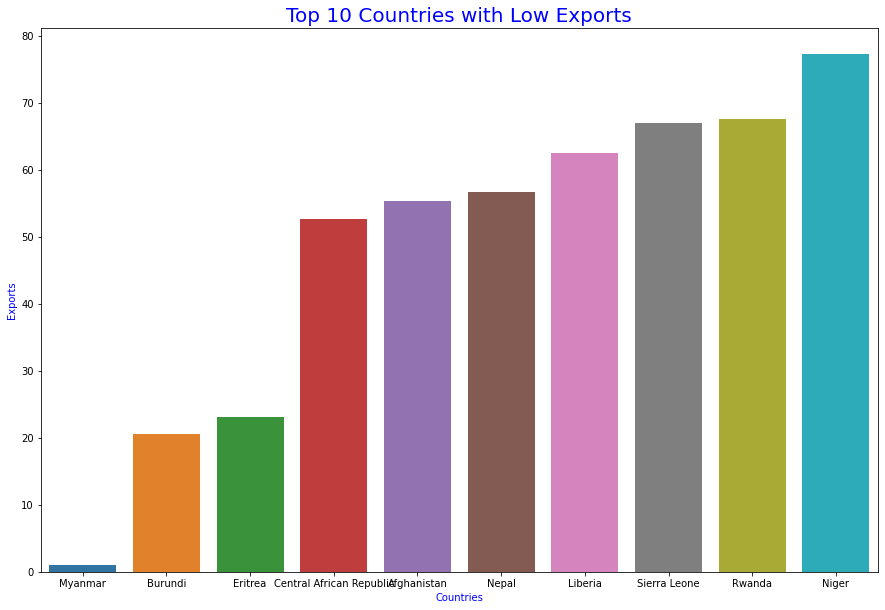

In [32]:
# Plotting the bar graph with country on x-axis and low Exports on y-axis
plt.figure(figsize = (15,10))
sns.barplot(x = 'country', y = 'exports_actual', data = df_exports_actual_l)
plt.title("Top 10 Countries with Low Exports", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("Countries", fontdict={'fontsize': 10, 'fontweight' : 3, 'color' : 'Blue'})
plt.ylabel("Exports", fontdict={'fontsize': 10, 'fontweight' : 3, 'color' : 'Blue'})
plt.show()

#### Myanmar has the lowest exports

In [33]:
# Finding the Top 10 Conutries with low Imports
df_imports_actual_l = df.sort_values('imports_actual')
df_imports_actual_l = df_imports_actual_l.head(10)

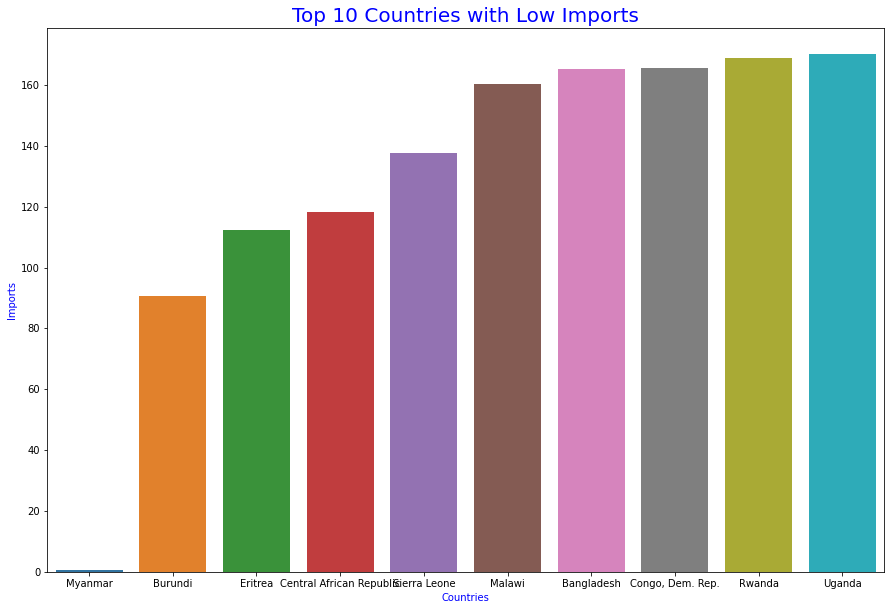

In [34]:
# Plotting the bar graph with country on x-axis and low Imports on y-axis
plt.figure(figsize = (15,10))
sns.barplot(x = 'country', y = 'imports_actual', data = df_imports_actual_l)
plt.title("Top 10 Countries with Low Imports", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("Countries", fontdict={'fontsize': 10, 'fontweight' : 3, 'color' : 'Blue'})
plt.ylabel("Imports", fontdict={'fontsize': 10, 'fontweight' : 3, 'color' : 'Blue'})
plt.show()

#### Myanmar also has the lowest imports of goods and services per capita

In [35]:
# Finding the Top 10 Conutries with High Imports
df_imports_actual = df.sort_values('imports_actual', ascending = False)
df_imports_actual = df_imports_actual.head(10)

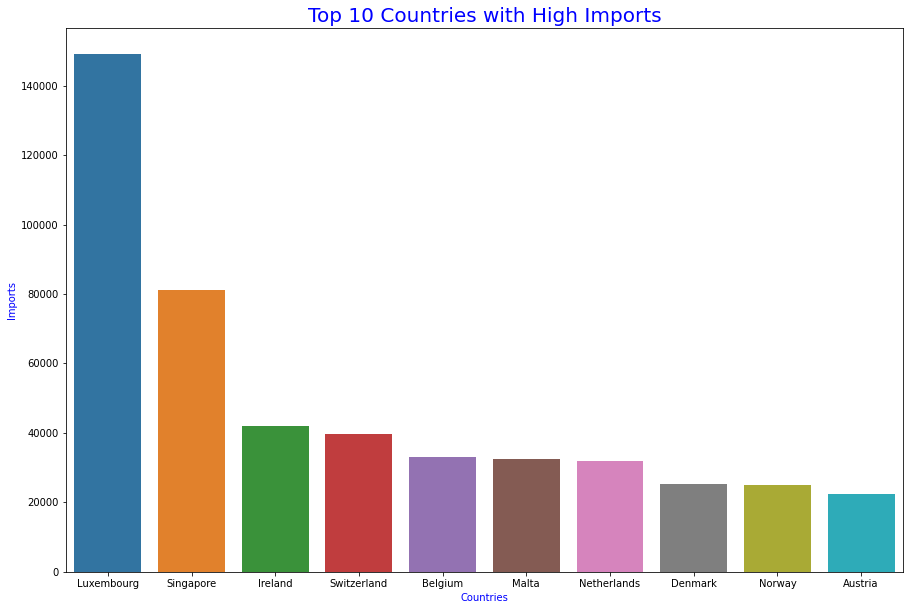

In [36]:
# Plotting the bar graph with country on x-axis and high Imports on y-axis
plt.figure(figsize = (15,10))
sns.barplot(x = 'country', y = 'imports_actual', data = df_imports_actual)
plt.title("Top 10 Countries with High Imports", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("Countries", fontdict={'fontsize': 10, 'fontweight' : 3, 'color' : 'Blue'})
plt.ylabel("Imports", fontdict={'fontsize': 10, 'fontweight' : 3, 'color' : 'Blue'})
plt.show()

#### Luxembourg ranks first in imports too

In [37]:
# Finding the Top 10 Conutries with High Health Expenditure
df_health = df.sort_values('health_actual', ascending = False)
df_health = df_health.head(10)

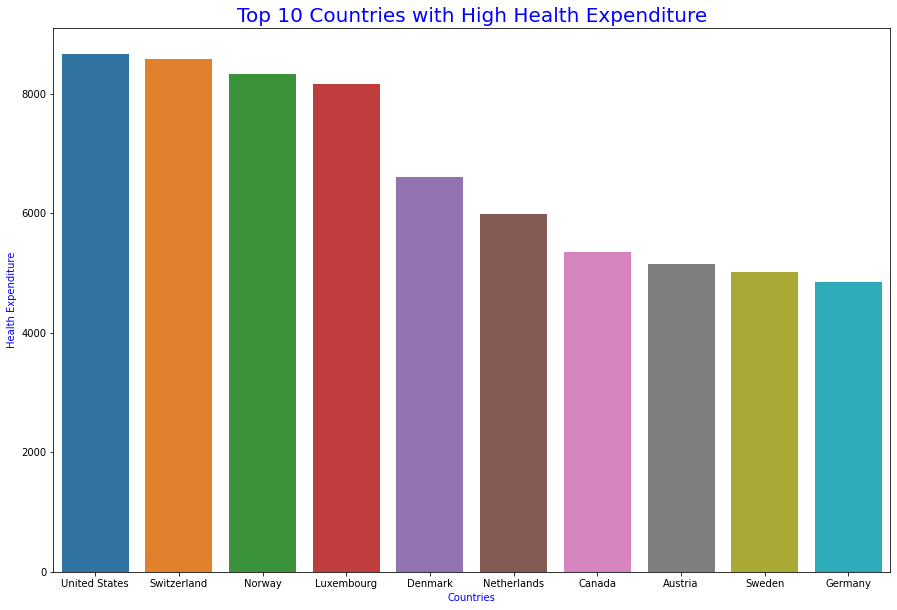

In [38]:
# Plotting the bar graph with country on x-axis and high Health Expenditure on y-axis
plt.figure(figsize = (15,10))
sns.barplot(x = 'country', y = 'health_actual', data = df_health)
plt.title("Top 10 Countries with High Health Expenditure", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("Countries", fontdict={'fontsize': 10, 'fontweight' : 3, 'color' : 'Blue'})
plt.ylabel("Health Expenditure", fontdict={'fontsize': 10, 'fontweight' : 3, 'color' : 'Blue'})
plt.show()

#### United States spends the highest in Healthcare

In [39]:
# Finding the Top 10 Conutries with Low Health Expenditure
df_health_l = df.sort_values('health_actual')
df_health_l = df_health_l.head(10)

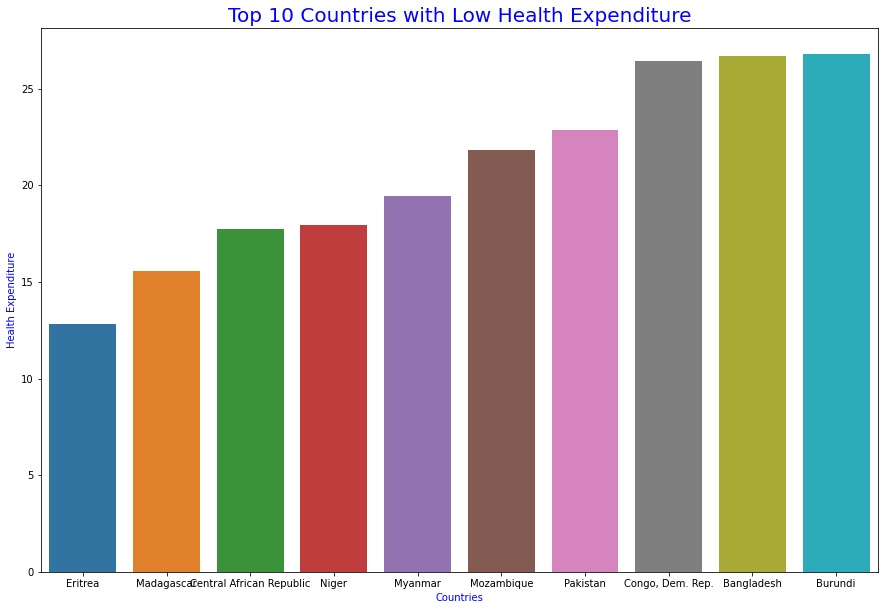

In [40]:
# Plotting the bar graph with country on x-axis and low Health Expedinture on y-axis
plt.figure(figsize = (15,10))
sns.barplot(x = 'country', y = 'health_actual', data = df_health_l)
plt.title("Top 10 Countries with Low Health Expenditure", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("Countries", fontdict={'fontsize': 10, 'fontweight' : 3, 'color' : 'Blue'})
plt.ylabel("Health Expenditure", fontdict={'fontsize': 10, 'fontweight' : 3, 'color' : 'Blue'})
plt.show()

#### Eritrea spends the lowest in Healthcare

In [41]:
df.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_actual,imports_actual,health_actual
0,Afghanistan,90.2,1610,9.44,56.2,5.82,553,55.30,248.297,41.9174
1,Albania,16.6,9930,4.49,76.3,1.65,4090,1145.20,1987.740,267.8950
2,Algeria,27.3,12900,16.10,76.5,2.89,4460,1712.64,1400.440,185.9820
3,Angola,119.0,5900,22.40,60.1,6.16,3530,2199.19,1514.370,100.6050
4,Antigua and Barbuda,10.3,19100,1.44,76.8,2.13,12200,5551.00,7185.800,735.6600


In [42]:
# Bi-Variate analysis of columns
feature = df.columns[1:]
for i in enumerate(feature):
    print(i)

(0, 'child_mort')
(1, 'income')
(2, 'inflation')
(3, 'life_expec')
(4, 'total_fer')
(5, 'gdpp')
(6, 'exports_actual')
(7, 'imports_actual')
(8, 'health_actual')


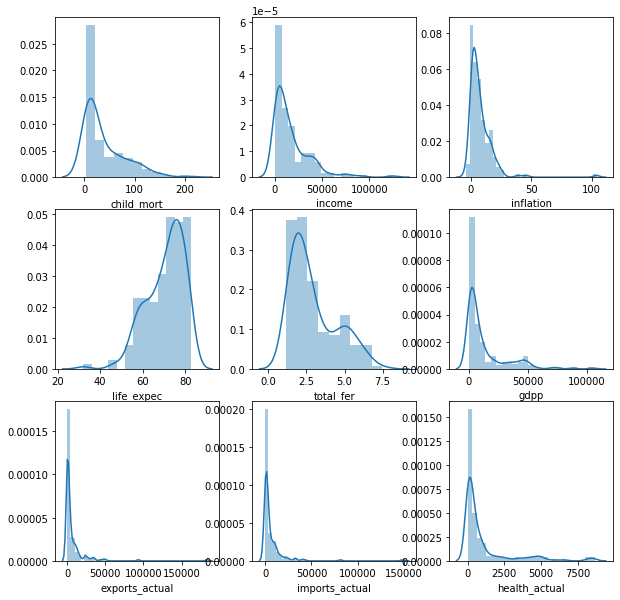

In [43]:
plt.figure(figsize = (10,10))
feature = df.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.distplot(df[i[1]])

#### The above graphs shows distribution of the all the variables

#### Outlier Treatment

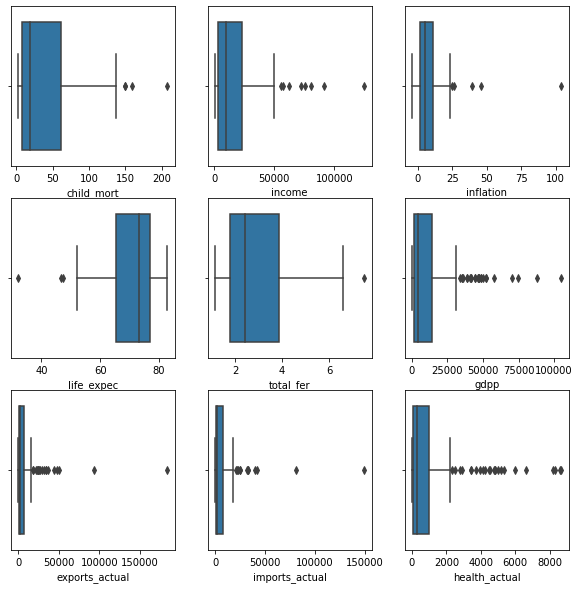

In [44]:
plt.figure(figsize = (10,10))
feature = df.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.boxplot(df[i[1]])

#### The maximun outliers in the dataset can be seen in the Health Expenditure and GDPP graphs. Some countries have extremely high Health Expenditure as well as high GDPP

### 3. Data Preparation

In [45]:
# Capping -- Looking at Outliers in the 3 specific columns Child Mortality, Income and GDPP
df['child_mort'].describe(percentiles = [0, 0.25, 0.50, 0.75, 0.95])

count    167.000000
mean      38.270060
std       40.328931
min        2.600000
0%         2.600000
25%        8.250000
50%       19.300000
75%       62.100000
95%      116.000000
max      208.000000
Name: child_mort, dtype: float64

In [46]:
df['income'].describe(percentiles = [0, 0.25, 0.50, 0.75, 0.95])

count       167.000000
mean      17144.688623
std       19278.067698
min         609.000000
0%          609.000000
25%        3355.000000
50%        9960.000000
75%       22800.000000
95%       48290.000000
max      125000.000000
Name: income, dtype: float64

In [47]:
df['gdpp'].describe(percentiles = [0, 0.25, 0.50, 0.75, 0.95])

count       167.000000
mean      12964.155689
std       18328.704809
min         231.000000
0%          231.000000
25%        1330.000000
50%        4660.000000
75%       14050.000000
95%       48610.000000
max      105000.000000
Name: gdpp, dtype: float64

#### We would not drop any outliers in these columns as we need to identify the country or countries in the direst need of NGO's funds

In [72]:
# Creating a separate dataframe for 3 cloumns
grouped_df = df[['child_mort', 'income', 'gdpp']]
grouped_df.head()

,child_mort,income,gdpp
0,90.2,1610,553
1,16.6,9930,4090
2,27.3,12900,4460
3,119.0,5900,3530
4,10.3,19100,12200


In [49]:
# Hopkins Check
# Calcluating the Hopkis Statistics
# Importing libraries
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [50]:
hopkins(grouped_df)

0.9311322276295119

#### Scaling Using Standard Scaler

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1 = scaler.fit_transform(grouped_df)
df1.shape

(167, 3)

In [52]:
df1 = pd.DataFrame(df1)
df1.columns = ['child_mort', 'income', 'gdpp']
df1.head()

,child_mort,income,gdpp
0,1.291532,-0.808245,-0.679180
1,-0.538949,-0.375369,-0.485623
2,-0.272833,-0.220844,-0.465376
3,2.007808,-0.585043,-0.516268
4,-0.695634,0.101732,-0.041817


### 4. Modelling

In [53]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [54]:
kmeans.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 3, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1,
       1, 2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 2, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 0, 0, 3, 2, 0, 2, 2, 0,
       0, 2, 2, 3, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       1, 1, 0, 0, 3, 1, 0, 2, 2, 2, 2, 2, 1, 3, 2, 2, 0, 2, 1, 0, 2, 2,
       0, 3, 2, 1, 2, 2, 1, 1, 2, 2, 0, 2, 1, 3, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0], dtype=int32)

#### Finding the Optimal Number of Clusters

#### SSD

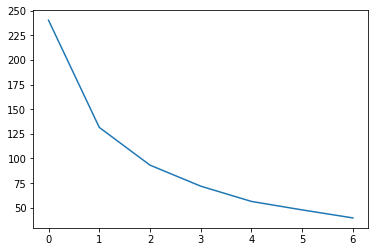

In [55]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df1)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

#### Silhouette Analysis

In [56]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5597788232000319
For n_clusters=3, the silhouette score is 0.5306239085564016
For n_clusters=4, the silhouette score is 0.532883709733191
For n_clusters=5, the silhouette score is 0.49252640953379373
For n_clusters=6, the silhouette score is 0.4533828771706268
For n_clusters=7, the silhouette score is 0.4248131491796254
For n_clusters=8, the silhouette score is 0.45415568854220223


In [57]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [58]:
kmeans.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 1, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 0, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 0, 1, 1,
       0, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0], dtype=int32)

In [73]:
# assigning the label
df['cluster_id'] = kmeans.labels_
df.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_actual,imports_actual,health_actual,cluster_id,cluster_labels
0,Afghanistan,90.2,1610,9.44,56.2,5.82,553,55.30,248.297,41.9174,0,0
1,Albania,16.6,9930,4.49,76.3,1.65,4090,1145.20,1987.740,267.8950,1,0
2,Algeria,27.3,12900,16.10,76.5,2.89,4460,1712.64,1400.440,185.9820,1,0
3,Angola,119.0,5900,22.40,60.1,6.16,3530,2199.19,1514.370,100.6050,0,1
4,Antigua and Barbuda,10.3,19100,1.44,76.8,2.13,12200,5551.00,7185.800,735.6600,1,0


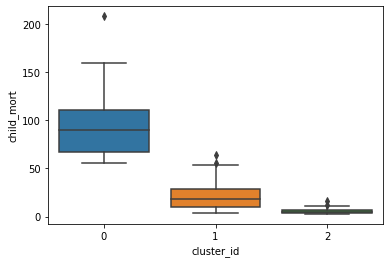

In [75]:
# Plotting Child Mortality Clusters
sns.boxplot(x='cluster_id', y='child_mort', data=df)

#### The cluster 0 clearly shows a higher number of Child Mortality rate in the countries

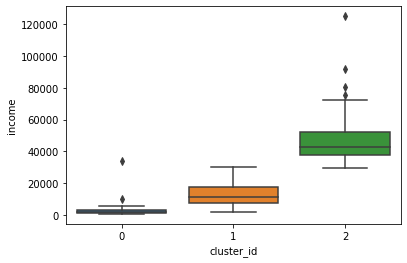

In [76]:
# Plotting Income clusters
sns.boxplot(x='cluster_id', y='income', data=df)

#### The cluster 0 has extremely low income countries

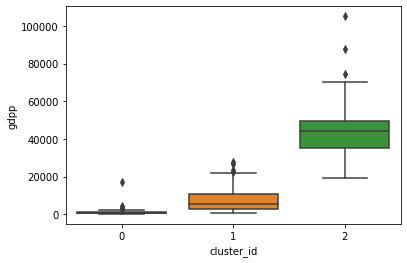

In [77]:
# Plotting GDPP clusters
sns.boxplot(x='cluster_id', y='gdpp', data=df)

#### The GDPP of cluster 0 is the lowest

#### Hierarchical Clustering

In [63]:
df1.head()

,child_mort,income,gdpp
0,1.291532,-0.808245,-0.679180
1,-0.538949,-0.375369,-0.485623
2,-0.272833,-0.220844,-0.465376
3,2.007808,-0.585043,-0.516268
4,-0.695634,0.101732,-0.041817


In [64]:
df.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_actual,imports_actual,health_actual,cluster_id
0,Afghanistan,90.2,1610,9.44,56.2,5.82,553,55.30,248.297,41.9174,0
1,Albania,16.6,9930,4.49,76.3,1.65,4090,1145.20,1987.740,267.8950,1
2,Algeria,27.3,12900,16.10,76.5,2.89,4460,1712.64,1400.440,185.9820,1
3,Angola,119.0,5900,22.40,60.1,6.16,3530,2199.19,1514.370,100.6050,0
4,Antigua and Barbuda,10.3,19100,1.44,76.8,2.13,12200,5551.00,7185.800,735.6600,1


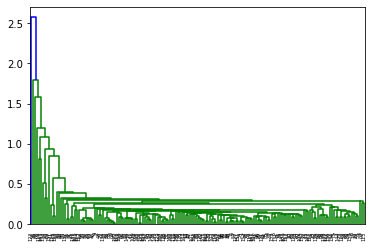

In [78]:
# Single linkage
mergings = linkage(df1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

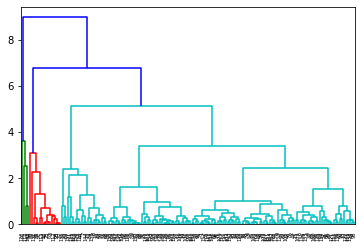

In [79]:
# Complete linkage
mergings = linkage(df1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [67]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [80]:
# Assigning cluster labels
df['cluster_labels'] = cluster_labels
df.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_actual,imports_actual,health_actual,cluster_id,cluster_labels
0,Afghanistan,90.2,1610,9.44,56.2,5.82,553,55.30,248.297,41.9174,0,0
1,Albania,16.6,9930,4.49,76.3,1.65,4090,1145.20,1987.740,267.8950,1,0
2,Algeria,27.3,12900,16.10,76.5,2.89,4460,1712.64,1400.440,185.9820,1,0
3,Angola,119.0,5900,22.40,60.1,6.16,3530,2199.19,1514.370,100.6050,0,1
4,Antigua and Barbuda,10.3,19100,1.44,76.8,2.13,12200,5551.00,7185.800,735.6600,1,0


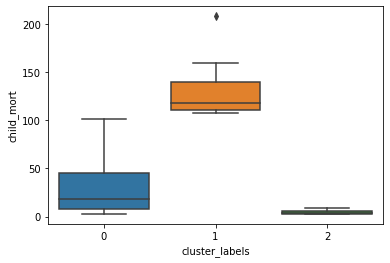

In [81]:
# Plotting Child Mortality
sns.boxplot(x='cluster_labels', y='child_mort', data=df)

#### The cluster 0 shows highest mortality rate

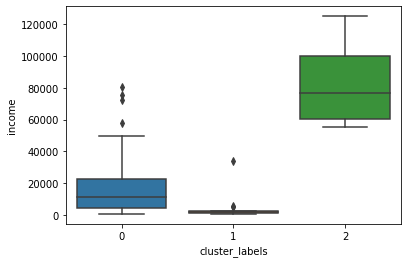

In [82]:
# Plotting Income Cluster
sns.boxplot(x='cluster_labels', y='income', data=df)

#### The cluster 1 shows lowest income amongst the 3 clusters

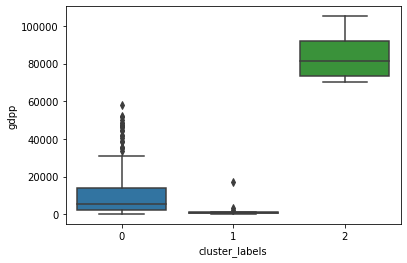

In [83]:
# Plotting GDPP Clusters
sns.boxplot(x='cluster_labels', y='gdpp', data=df)

#### The cluster 1 shows lowest GDPP

### 5. Final Analysis & Making Recommendations

##### From both the methods of clustering we have seen that the cluster 0 of countries need the NGO's focus most as they are in the least income making and GDPP groups and also in the highest child mortality cluster

In [88]:
pd.set_option('display.max_rows', None)
df.sort_values('cluster_labels')

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_actual,imports_actual,health_actual,cluster_id,cluster_labels
0,Afghanistan,90.2,1610,9.440,56.2,5.82,553,55.30000,248.297000,41.9174,0,0
103,Mongolia,26.1,7710,39.200,66.2,2.64,2650,1237.55000,1502.550000,144.1600,1,0
104,Montenegro,6.8,14000,1.600,76.4,1.77,6680,2471.60000,4188.360000,608.5480,1,0
105,Morocco,33.5,6440,0.976,73.5,2.58,2830,911.26000,1216.900000,147.1600,1,0
106,Mozambique,101.0,918,7.640,54.5,5.56,419,131.98500,193.578000,21.8299,0,0
107,Myanmar,64.4,3720,7.040,66.8,2.41,988,1.07692,0.651092,19.4636,0,0
108,Namibia,56.0,8460,3.560,58.6,3.60,5190,2480.82000,3150.330000,351.8820,1,0
109,Nepal,47.0,1990,15.100,68.3,2.61,592,56.71360,215.488000,31.0800,1,0
102,Moldova,17.2,3910,11.100,69.7,1.27,1630,638.96000,1279.550000,190.7100,1,0
110,Netherlands,4.5,45500,0.848,80.7,1.79,50300,36216.00000,31990.800000,5985.7000,2,0
